In [43]:
pip install scikit-learn pandas matplotlib

  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import tree
from sklearn.metrics import accuracy_score

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
# data prep
col_list = ['Pclass', 'Survived', 'Sex', 'Age']
df = df.dropna().reset_index(drop=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df[col_list]
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass', 'Sex', 'Age']], df['Survived'], test_size=0.33, random_state=42, stratify=df['Survived'])
cv_splitter = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [108]:
# prepruning: use cross validation to find the optimal depth of the tree
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

param_distributions = {
    'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_distributions,
    n_jobs=-1,
    verbose=1,
    cv=cv_splitter
)

t1 = time.perf_counter()
grid_search.fit(X_train, y_train)
print('Time elapsed: {}'.format(time.perf_counter() - t1))

print(f"Mean cross-validation accuracy with best parameters: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 11 candidates, totalling 33 fits
Time elapsed: 0.057969699962995946
Mean cross-validation accuracy with best parameters: 0.7707


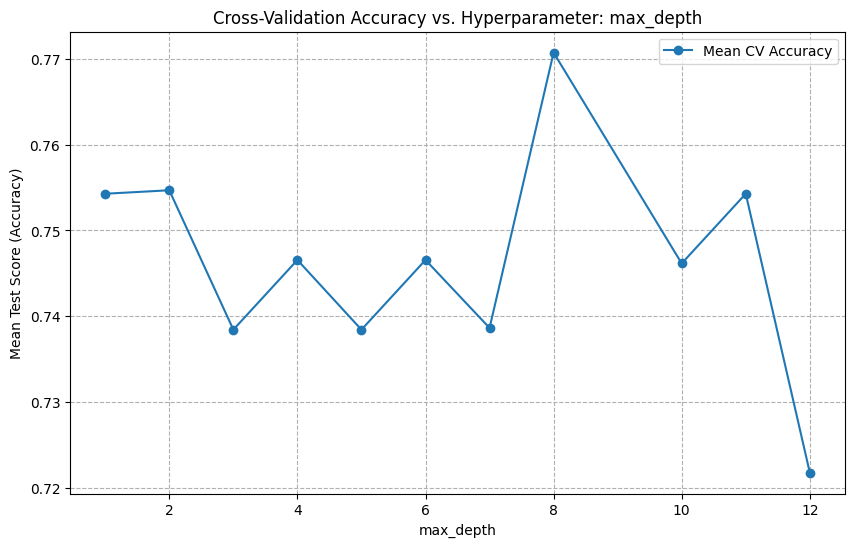

In [109]:
# plot
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(results_df['param_classifier__max_depth'], results_df['mean_test_score'], marker='o', label='Mean CV Accuracy')

plt.title(f'Cross-Validation Accuracy vs. Hyperparameter: {'max_depth'}')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [110]:
# fit the best model 
dtc = DecisionTreeClassifier(max_depth = 8)
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [111]:
y_pred = dtc.predict(X_test)
print('Accuracy on test is {}'.format(accuracy_score(y_test, y_pred)))

Accuracy on test is 0.7540983606557377


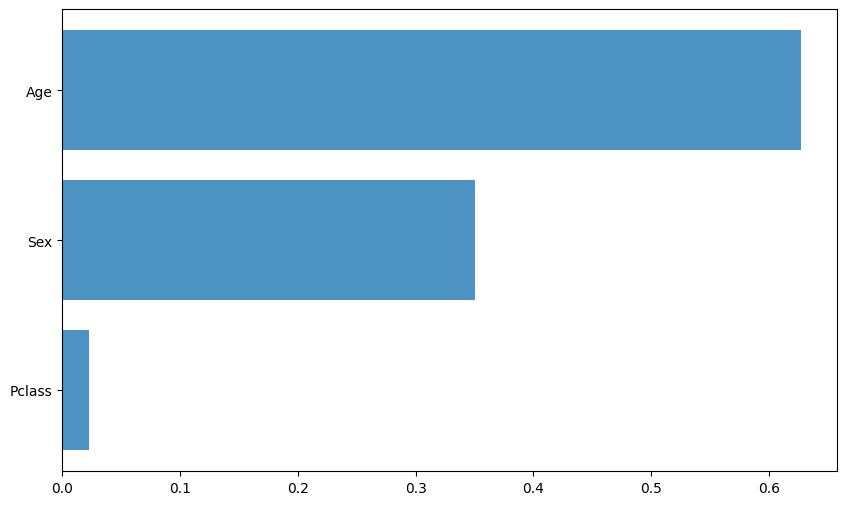

In [112]:
plt.figure(figsize=(10, 6))
plt.barh(dtc.feature_names_in_, dtc.feature_importances_, alpha=0.8)
plt.show()

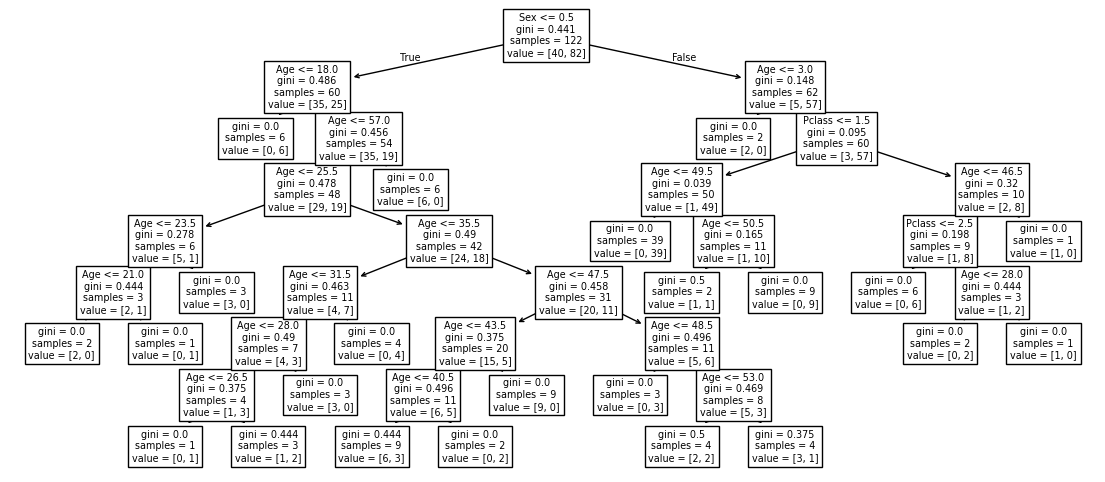

In [113]:
# visualize the tree
plt.figure(figsize=(14, 6))
tree.plot_tree(dtc, feature_names = dtc.feature_names_in_)
plt.show()

In [114]:
# post pruning using CCP
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

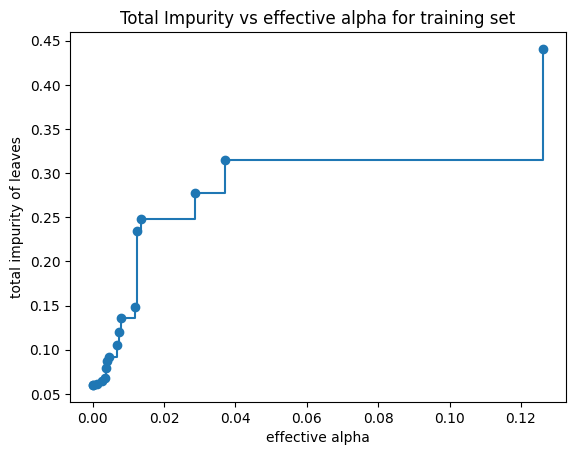

In [115]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [116]:
# prepruning: use cross validation to find the optimal depth of the tree
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

param_distributions = {
    'classifier__ccp_alpha': ccp_alphas
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_distributions,
    n_jobs=-1,
    verbose=1,
    cv=cv_splitter
)

t1 = time.perf_counter()
grid_search.fit(X_train, y_train)
print('Time elapsed: {}'.format(time.perf_counter() - t1))

print(f"Mean cross-validation accuracy with best parameters: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 17 candidates, totalling 51 fits
Time elapsed: 0.07333159993868321
Mean cross-validation accuracy with best parameters: 0.7628


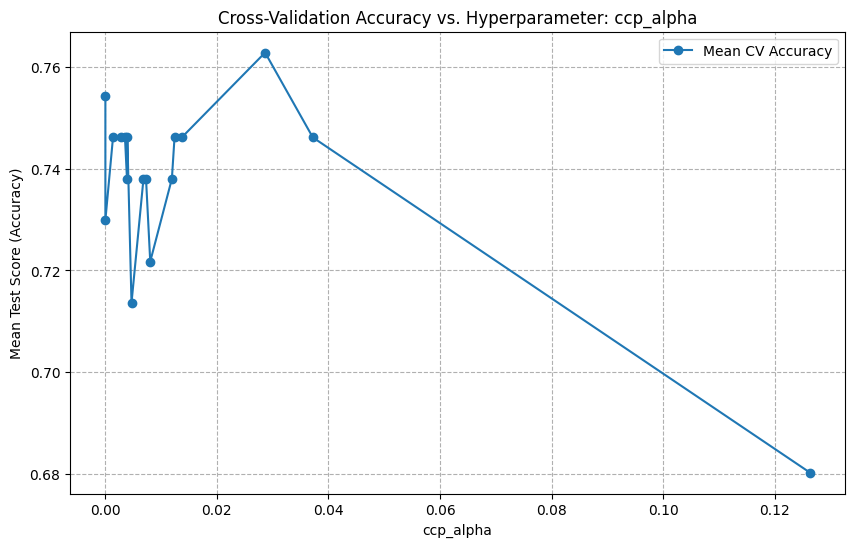

In [117]:
# plot
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(results_df['param_classifier__ccp_alpha'], results_df['mean_test_score'], marker='o', label='Mean CV Accuracy')

plt.title(f'Cross-Validation Accuracy vs. Hyperparameter: {'ccp_alpha'}')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [118]:
results_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,0.002542,0.000472,0.002344,0.000629,0.028636,{'classifier__ccp_alpha': 0.028635642517186685},0.756098,0.707317,0.825,0.762805,0.048277,1
0,0.002834,0.000233,0.001671,0.000474,0.000000,{'classifier__ccp_alpha': 0.0},0.804878,0.682927,0.775,0.754268,0.051900,2
3,0.002669,0.000464,0.001333,0.000473,0.002732,{'classifier__ccp_alpha': 0.0027322404371584695},0.780488,0.682927,0.775,0.746138,0.044753,3
2,0.002712,0.000238,0.001668,0.000465,0.001366,{'classifier__ccp_alpha': 0.0013661202185792348},0.780488,0.682927,0.775,0.746138,0.044753,3
6,0.002343,0.000237,0.001003,0.000817,0.003934,{'classifier__ccp_alpha': 0.003934426229508199},0.804878,0.658537,0.775,0.746138,0.063133,3
12,0.002999,0.000816,0.001138,0.000098,0.012397,{'classifier__ccp_alpha': 0.012397097438081048},0.780488,0.682927,0.775,0.746138,0.044753,3
15,0.002843,0.000627,0.001679,0.000232,0.037189,{'classifier__ccp_alpha': 0.03718882817243474},0.756098,0.707317,0.775,0.746138,0.028515,3
4,0.003168,0.000850,0.002174,0.001032,0.003513,{'classifier__ccp_alpha': 0.0035128805620608904},0.804878,0.658537,0.775,0.746138,0.063133,3
13,0.002804,0.000569,0.001000,0.000001,0.013699,{'classifier__ccp_alpha': 0.013699149969641777},0.780488,0.682927,0.775,0.746138,0.044753,3
9,0.002006,0.001086,0.001506,0.000412,0.007286,{'classifier__ccp_alpha': 0.007285974499089253},0.780488,0.658537,0.775,0.738008,0.056240,10


In [119]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.028636)
mod = clf.fit(X_train, y_train)
print('Depth is {} and leaves are {}'.format(mod.get_depth(), mod.get_n_leaves()))

Depth is 2 and leaves are 3


In [120]:
y_pred = mod.predict(X_test)
print('Accuracy on test is {}'.format(accuracy_score(y_test, y_pred)))

Accuracy on test is 0.7377049180327869
